# CHURN ANALYSIS AND EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('telecomchurn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Transforming 'Partner' and 'Dependents' into numerical values
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

#converting "No phone service" to "No" in 'PhoneService' and 'MultipleLines' columns
df['PhoneService'] = df['PhoneService'].replace('No phone service', 'No')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df.head()

# columns to binary (Yes as 1, No as 0, No internet service remains the same)
binary_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 'No internet service'))


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,0,0,1,No,No,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,No,No,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


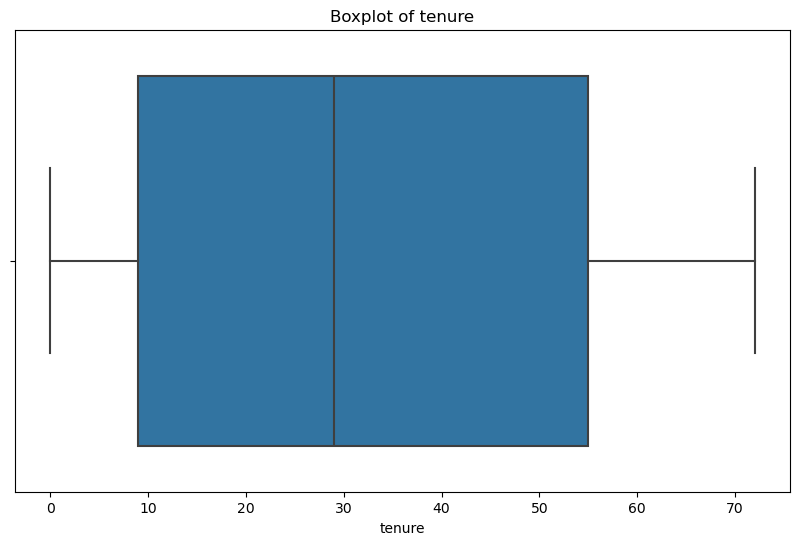

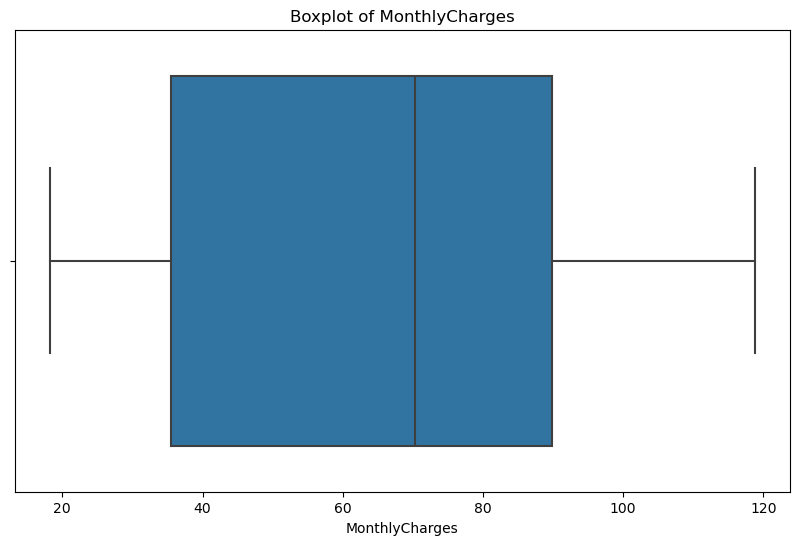

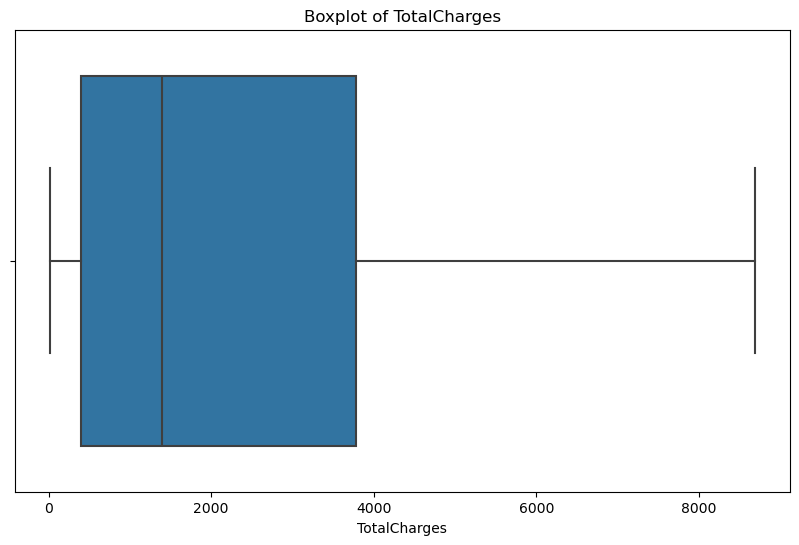

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Filling NaN values in TotalCharges with the mean of the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], whis=1.5)
    plt.title(f'Boxplot of {feature}')
    plt.show()

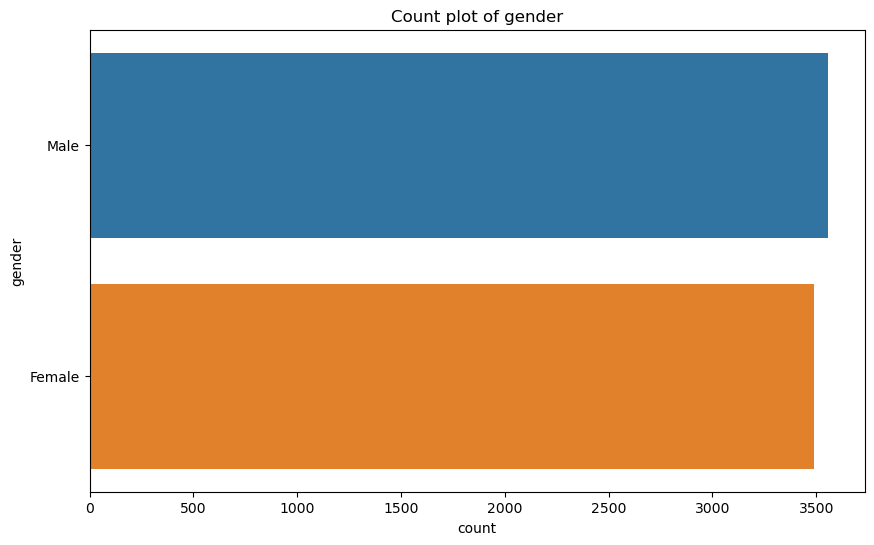

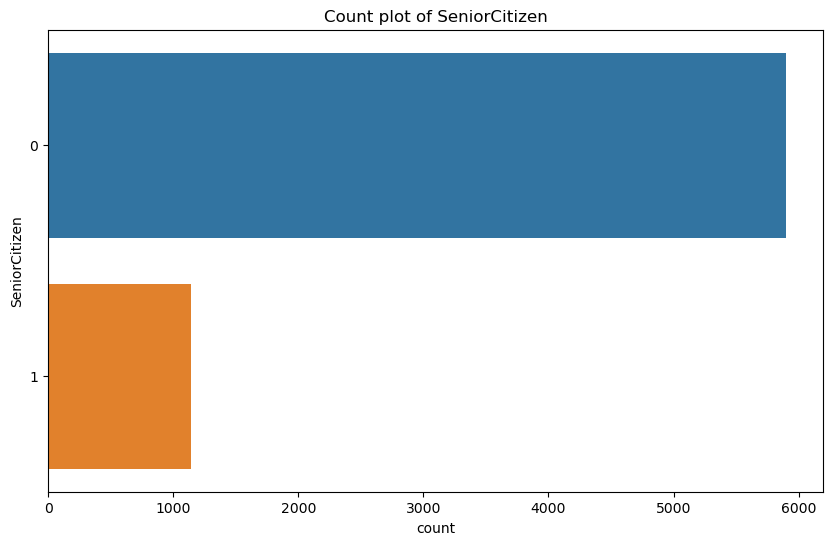

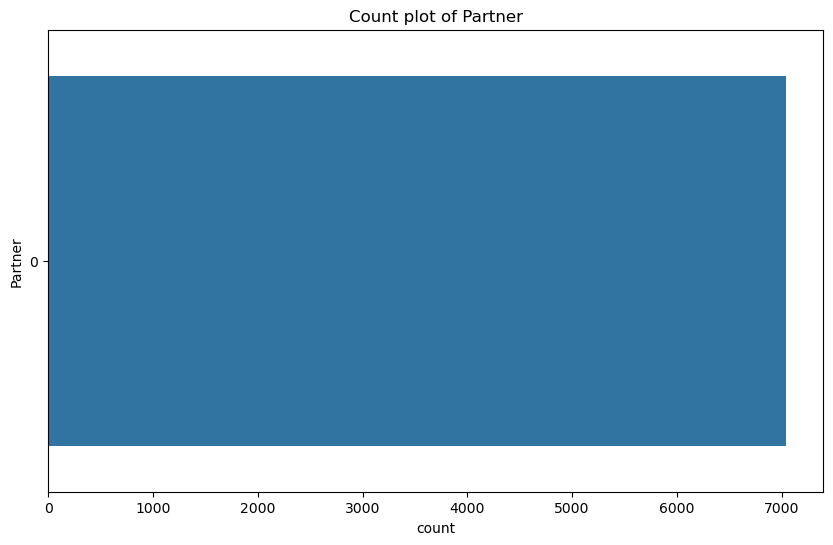

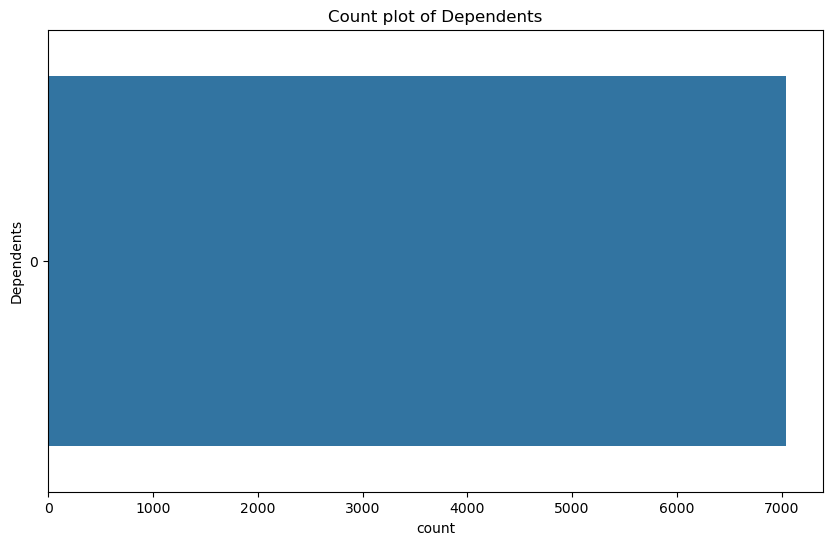

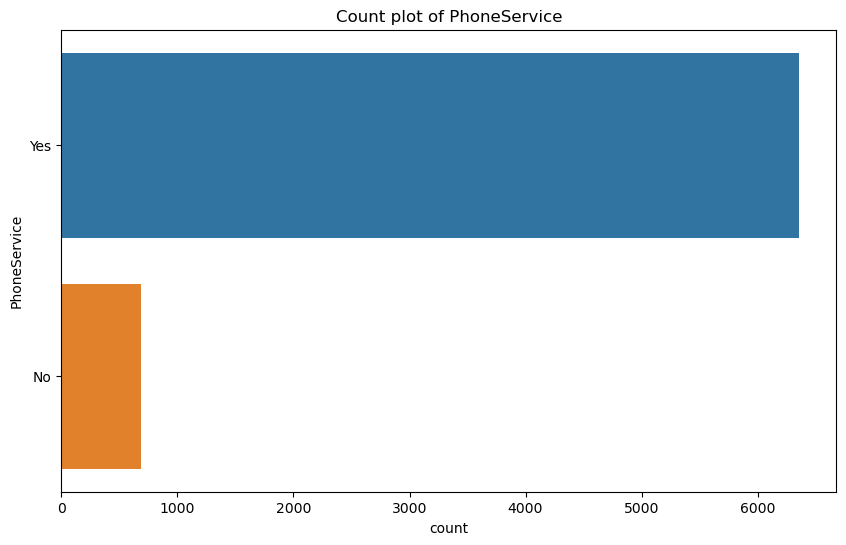

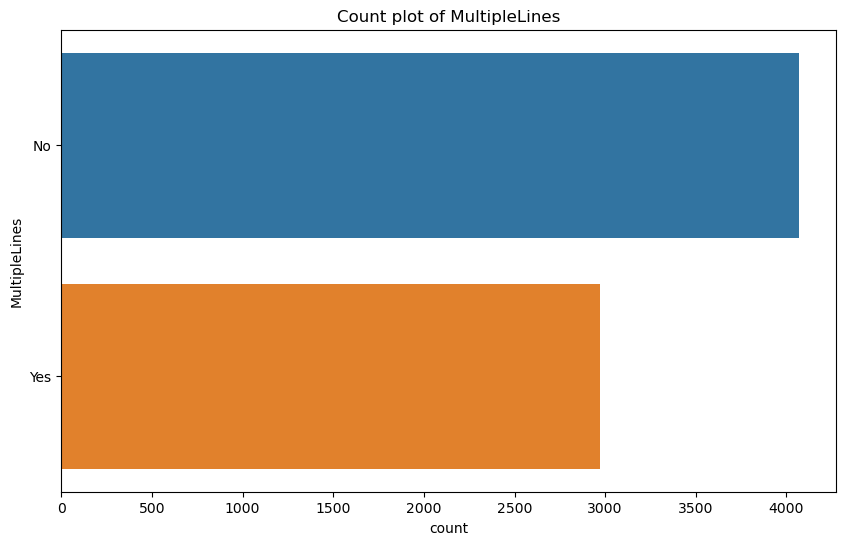

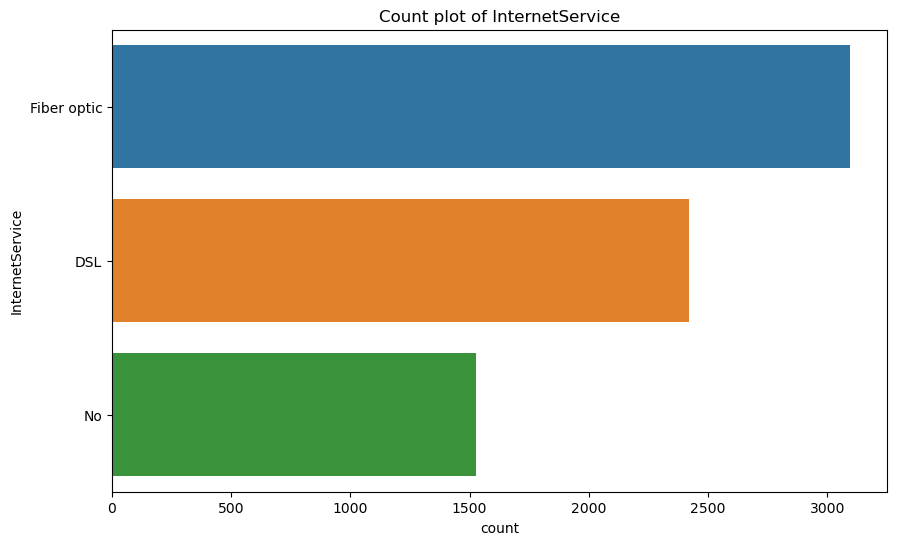

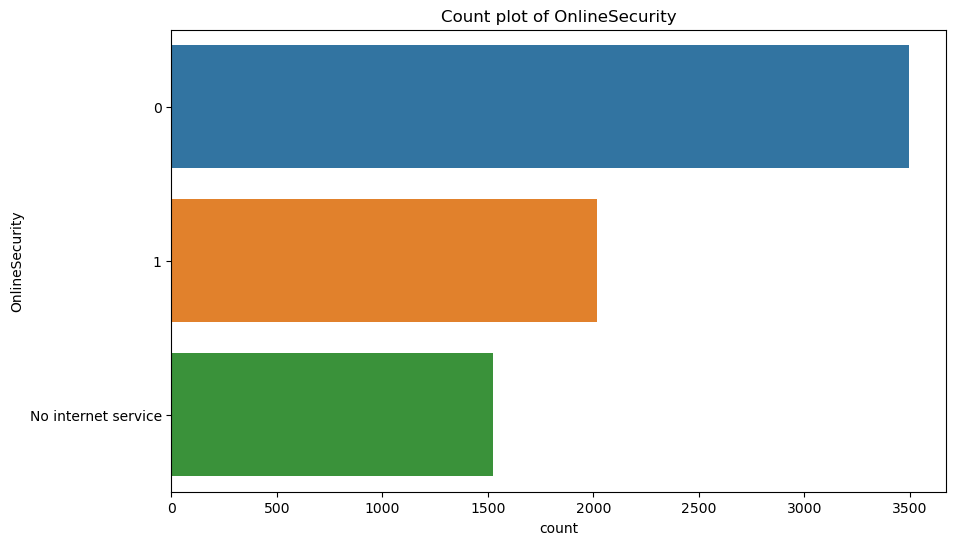

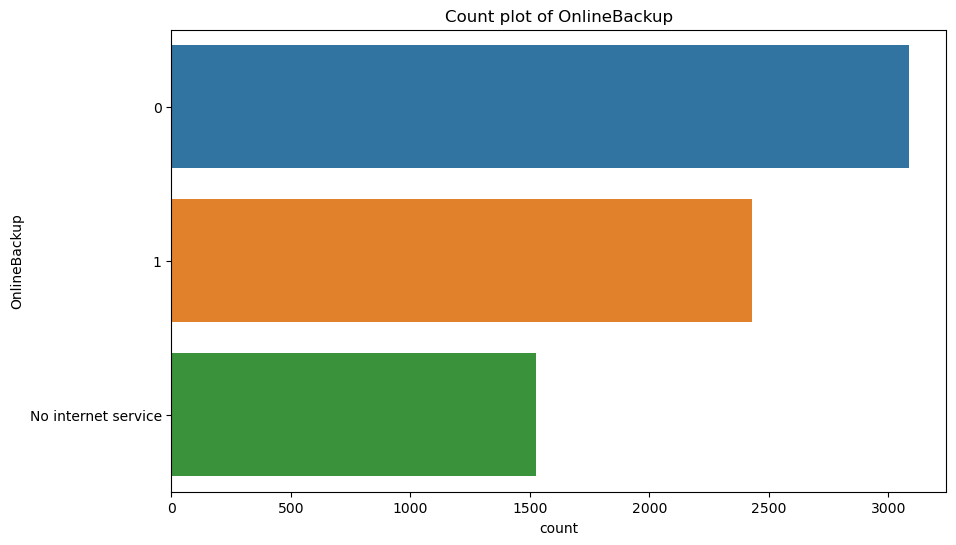

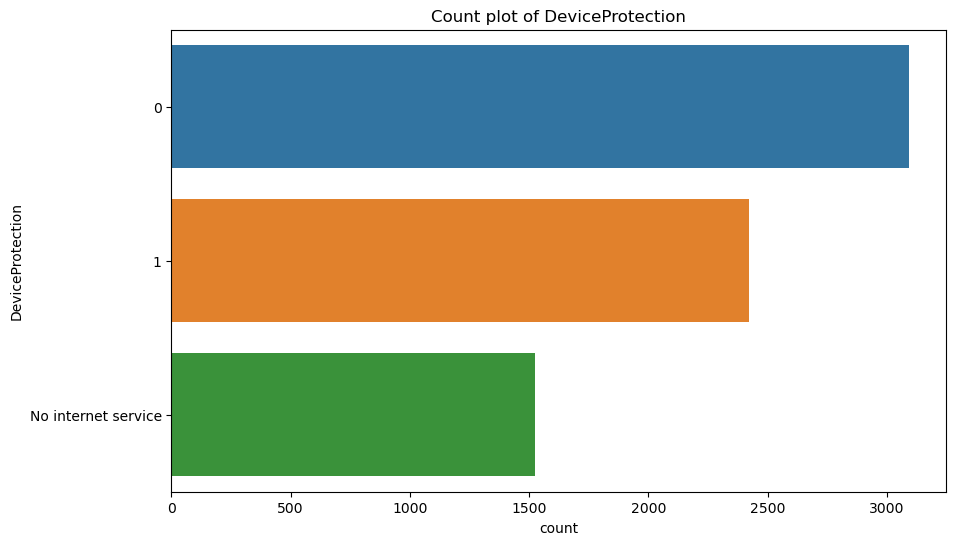

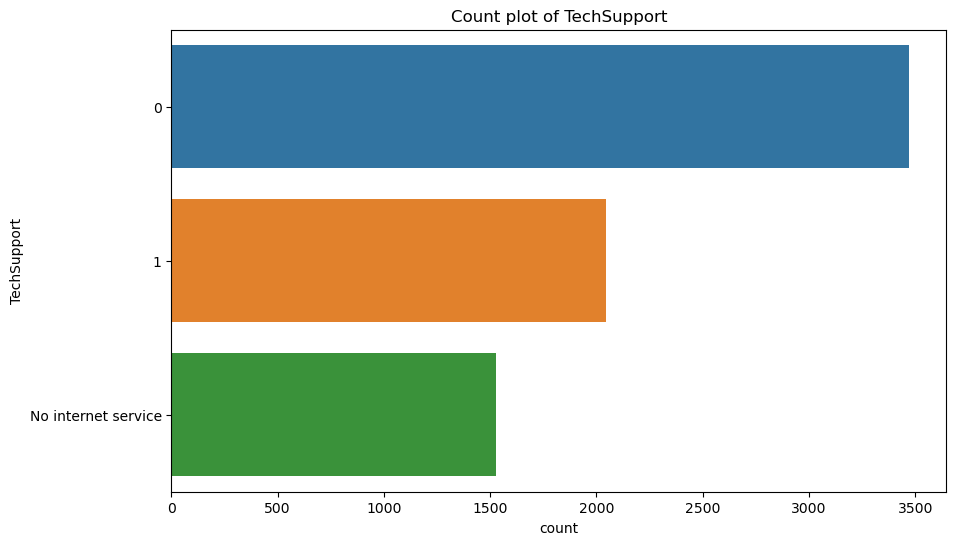

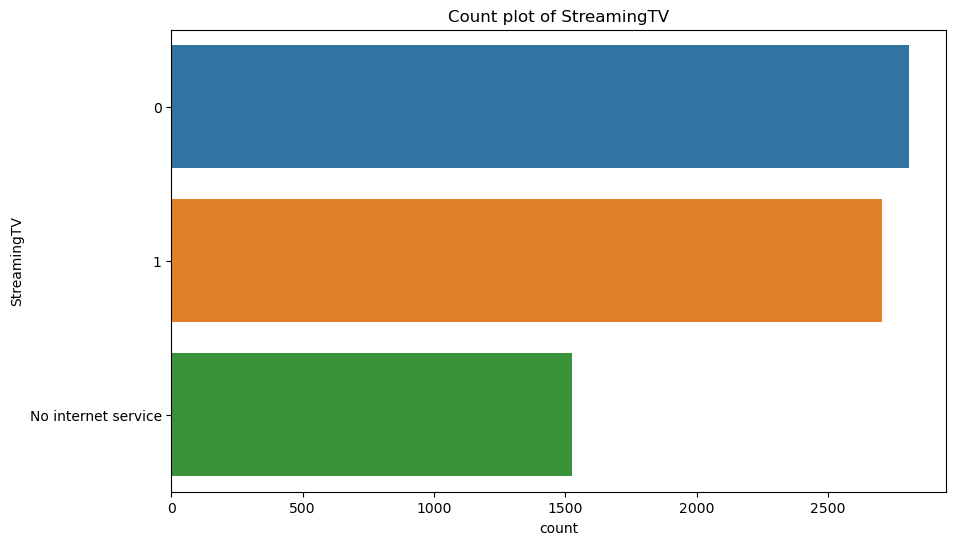

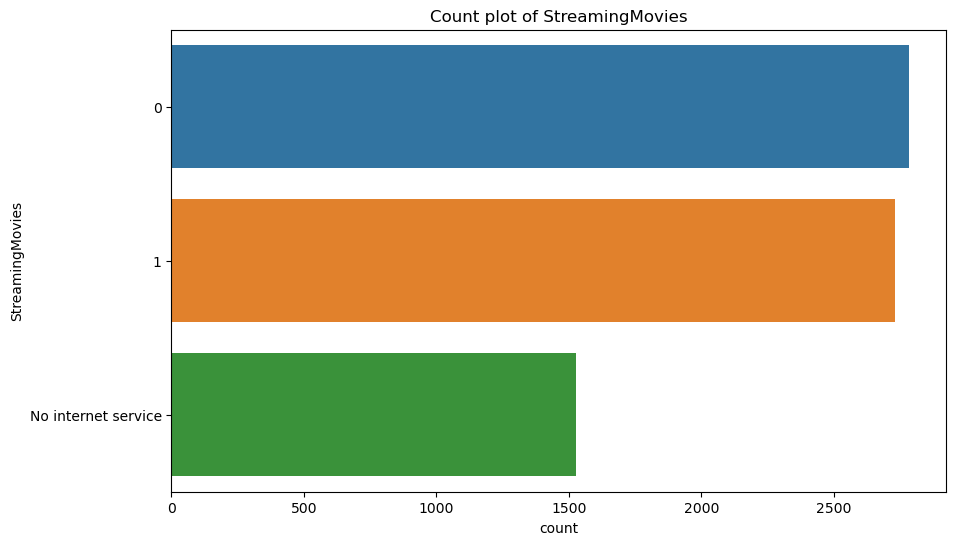

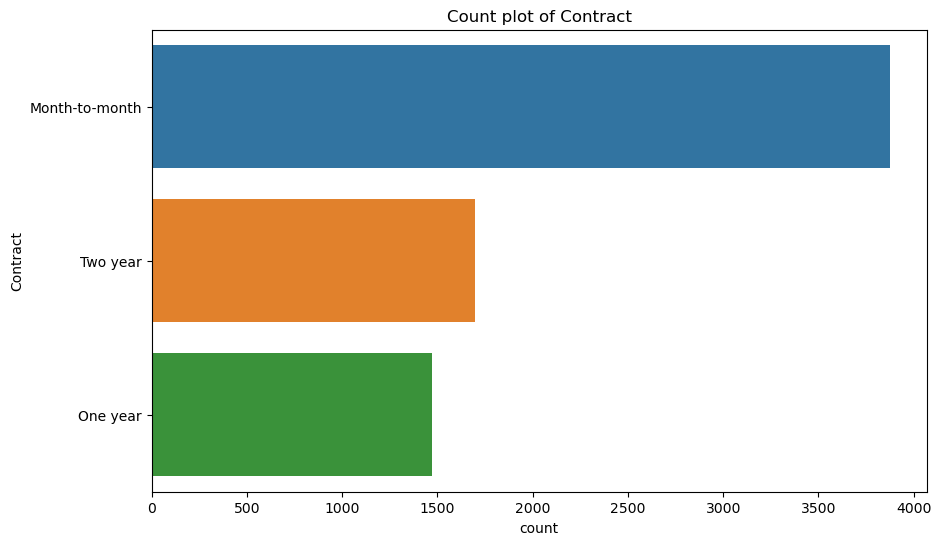

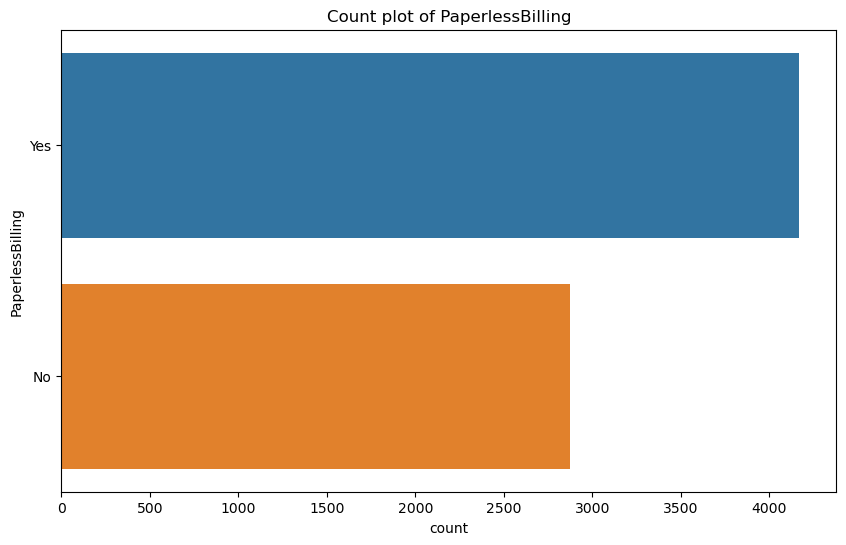

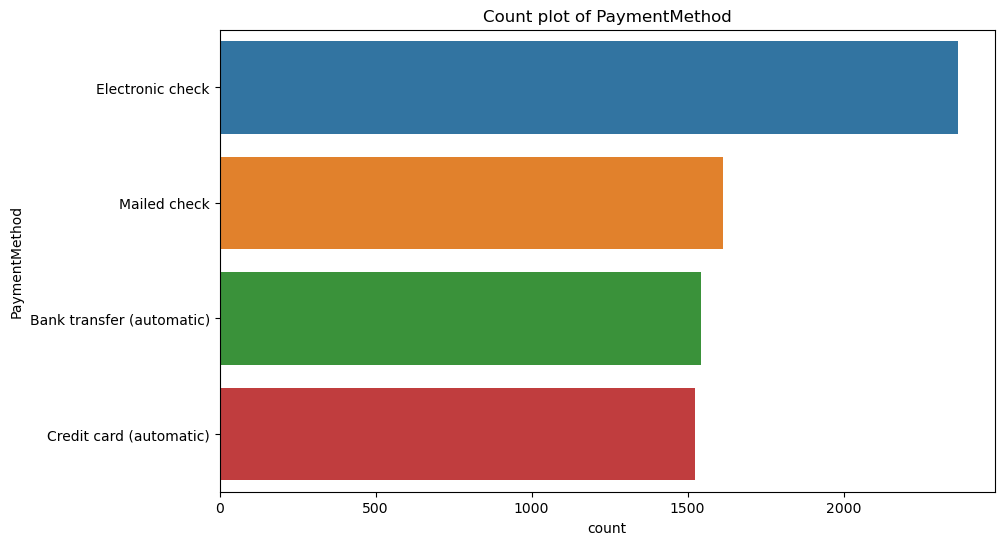

In [13]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count plot of {feature}')
    plt.show()    

In [17]:
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
churn_rate = df['Churn_numeric'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

Overall churn rate: 26.54%


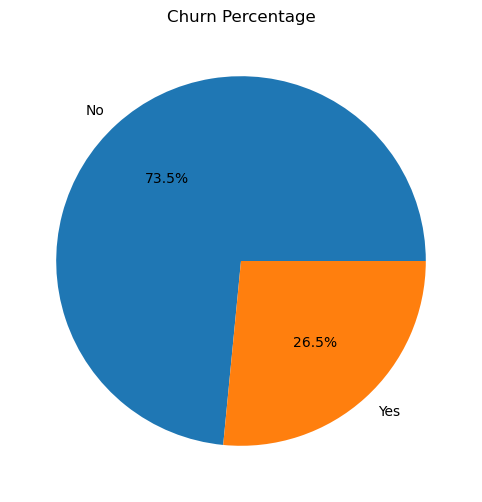

In [18]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Percentage')
plt.ylabel('')
plt.show()

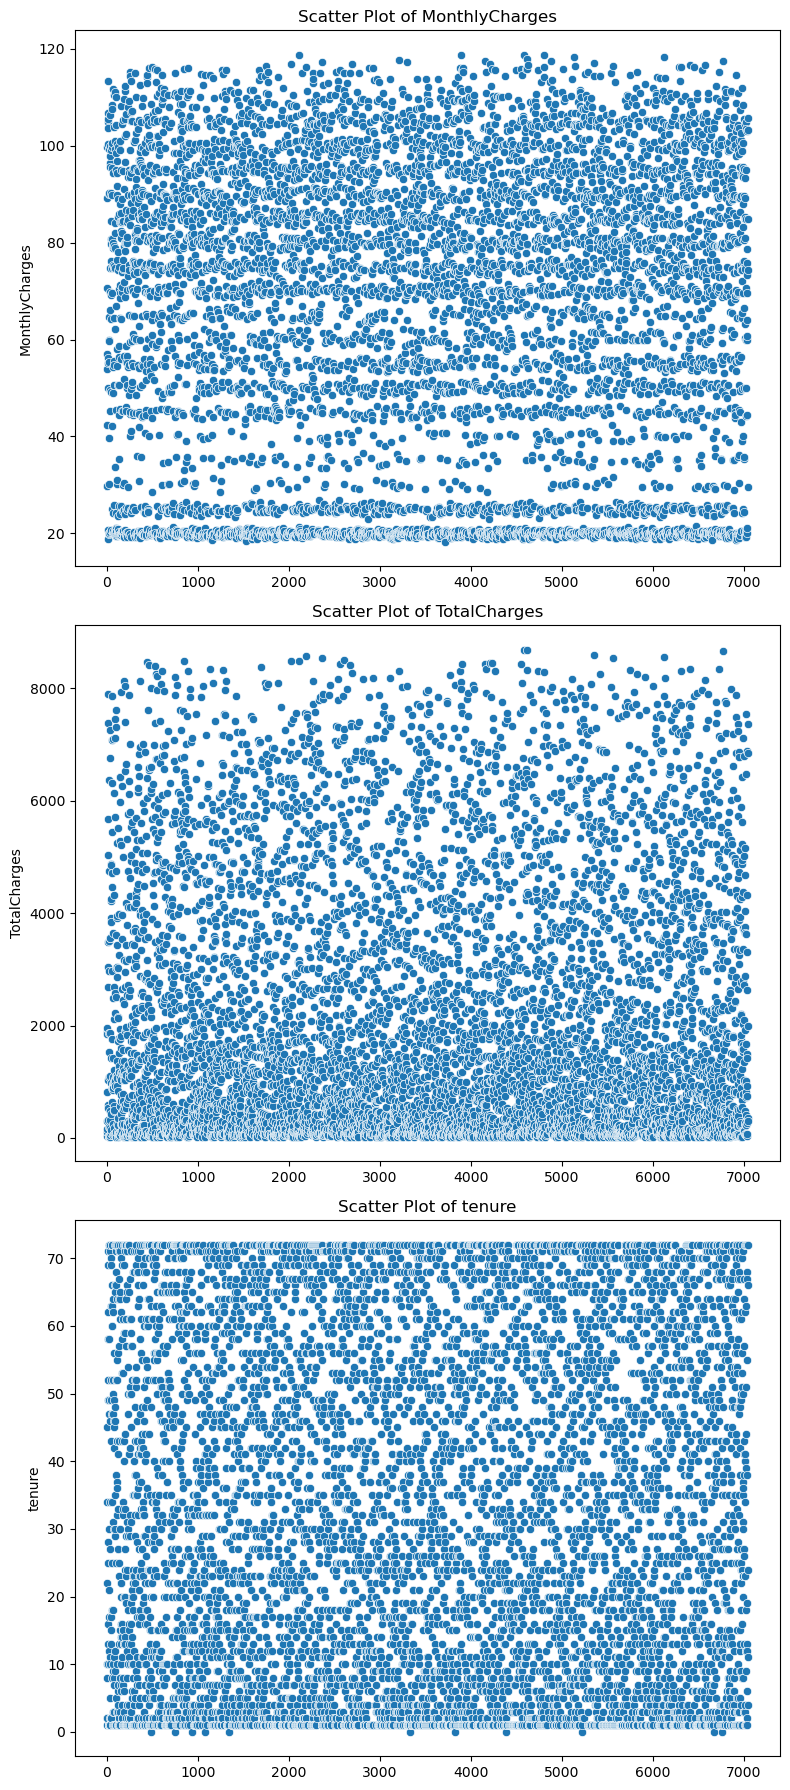

In [19]:
#scatter plots
fig, axes = plt.subplots(3, 1, figsize=(8, 18))
sns.scatterplot(ax=axes[0], x=df.index, y=df['MonthlyCharges']).set(title='Scatter Plot of MonthlyCharges')
sns.scatterplot(ax=axes[1], x=df.index, y=df['TotalCharges']).set(title='Scatter Plot of TotalCharges')
sns.scatterplot(ax=axes[2], x=df.index, y=df['tenure']).set(title='Scatter Plot of tenure')
plt.tight_layout()
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_16712\26873911.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalCharges'], shade=True)
C:\Users\aksha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


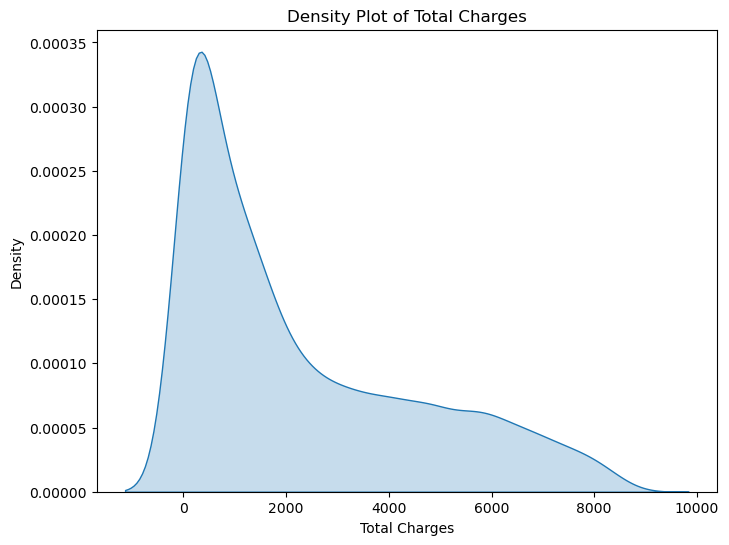

In [20]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['TotalCharges'], shade=True)
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Density Plot of Total Charges')
plt.show()

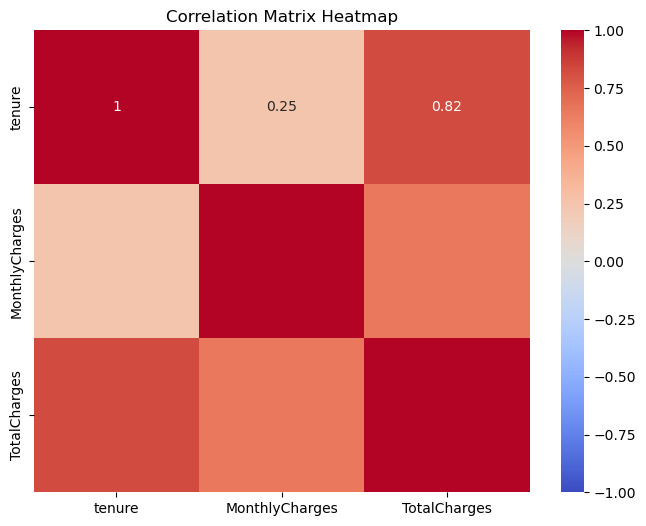

In [21]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
subset_df = df[numerical_cols]
corr_matrix = subset_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

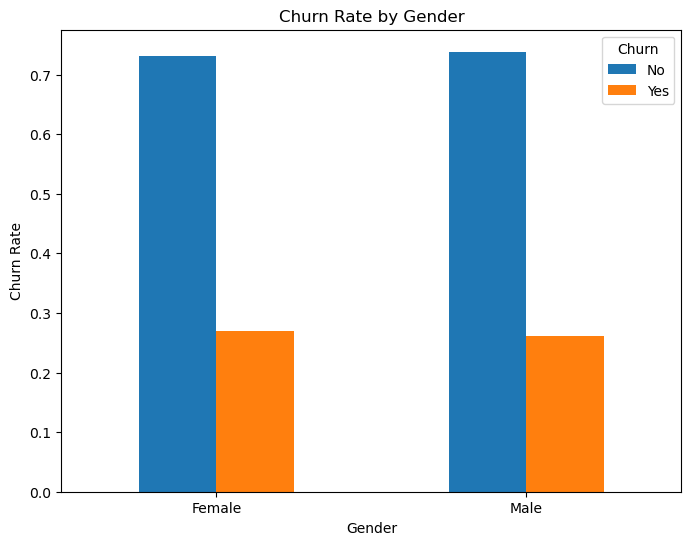

<Figure size 800x600 with 0 Axes>

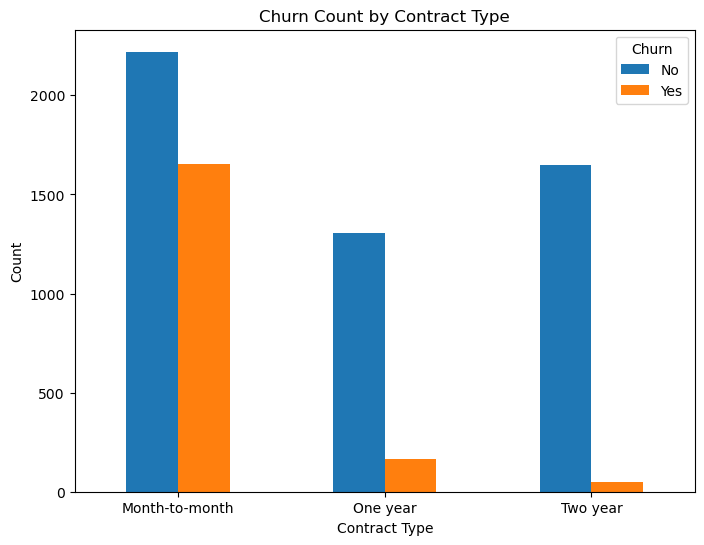

<Figure size 1000x600 with 0 Axes>

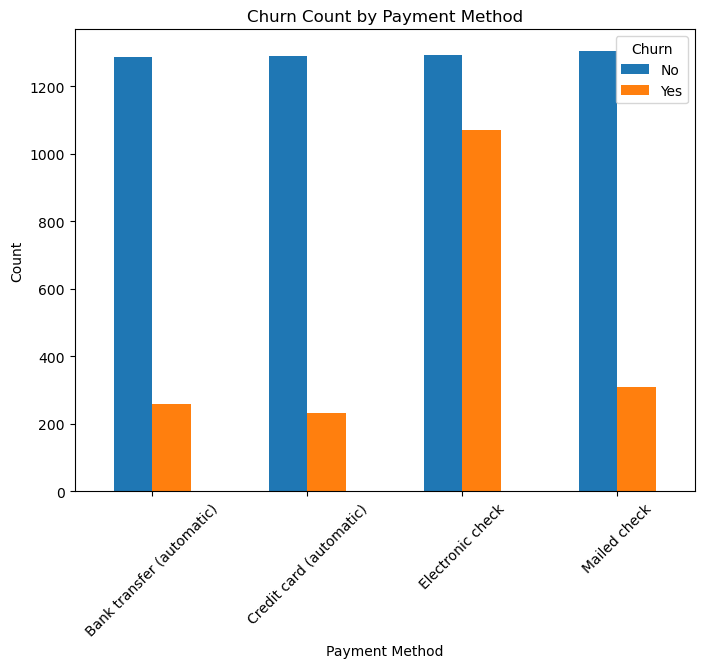

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rates by gender
churn_rates = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Plotting grouped bar chart
churn_rates.plot(kind='bar', figsize=(8, 6))
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

# churn by contract
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
plt.figure(figsize=(8, 6))
contract_churn.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

# Grouping by payment method and churn status
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
plt.figure(figsize=(10, 6))
payment_churn.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()
